# Exploratory Data Analysis

In [11]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = pd.read_csv("/Users/chira/Downloads/data_clean.csv",index_col=0)

In [1]:
data

NameError: name 'data' is not defined

In [14]:
data.tail(10)

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
149   30.0    193.0   6.9     70     9   26  2010    70       C
150    NaN    145.0  13.2     77     9   27  2010    77      PS
151   14.0    191.0  14.3     75     9   28  2010    75       S
152   18.0    131.0   8.0     76     9   29  2010    76      PS
153   20.0    223.0  11.5     68     9   30  2010    68       S
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

In [15]:
#Data Structure 
type(data)
data.shape

(158, 9)

In [16]:
#data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# Data type conversion

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [18]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')           
data['Wind']=data['Wind'].astype('int64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    int64   
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 11.4 KB


####More on data type conversions
[link text](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

# Duplicates

In [20]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [21]:
data

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1     41.0    190.0     7    67.0    5.0    1  2010    67       S
2     36.0    118.0     8    72.0    5.0    2  2010    72       C
3     12.0    149.0    12    74.0    5.0    3  2010    74      PS
4     18.0    313.0    11    62.0    5.0    4  2010    62       S
5      NaN      NaN    14    56.0    5.0    5  2010    56       S
..     ...      ...   ...     ...    ...  ...   ...   ...     ...
154   41.0    190.0     7    67.0    5.0    1  2010    67       C
155   30.0    193.0     6    70.0    9.0   26  2010    70      PS
156    NaN    145.0    13    77.0    9.0   27  2010    77       S
157   14.0    191.0    14    75.0    9.0   28  2010    75       S
158   18.0    131.0     8    76.0    9.0   29  2010    76       C

[158 rows x 9 columns]

In [22]:
#Print the duplicated rows
data[data.duplicated()]plt.

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
157   14.0    191.0    14    75.0    9.0   28  2010    75       S

In [23]:
data_cleaned1=data.drop_duplicates()

In [24]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [25]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [26]:
data_cleaned2

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1     41.0    190.0     7    5.0    1  2010    67       S
2     36.0    118.0     8    5.0    2  2010    72       C
3     12.0    149.0    12    5.0    3  2010    74      PS
4     18.0    313.0    11    5.0    4  2010    62       S
5      NaN      NaN    14    5.0    5  2010    56       S
..     ...      ...   ...    ...  ...   ...   ...     ...
153   20.0    223.0    11    9.0   30  2010    68       S
154   41.0    190.0     7    5.0    1  2010    67       C
155   30.0    193.0     6    9.0   26  2010    70      PS
156    NaN    145.0    13    9.0   27  2010    77       S
158   18.0    131.0     8    9.0   29  2010    76       C

[157 rows x 8 columns]

# Rename the columns

In [27]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [28]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1     41.0  190.0     7    5.0    1  2010    67       S
2     36.0  118.0     8    5.0    2  2010    72       C
3     12.0  149.0    12    5.0    3  2010    74      PS
4     18.0  313.0    11    5.0    4  2010    62       S
5      NaN    NaN    14    5.0    5  2010    56       S
..     ...    ...   ...    ...  ...   ...   ...     ...
153   20.0  223.0    11    9.0   30  2010    68       S
154   41.0  190.0     7    5.0    1  2010    67       C
155   30.0  193.0     6    9.0   26  2010    70      PS
156    NaN  145.0    13    9.0   27  2010    77       S
158   18.0  131.0     8    9.0   29  2010    76       C

[157 rows x 8 columns]

# Outlier Detection

<AxesSubplot:>

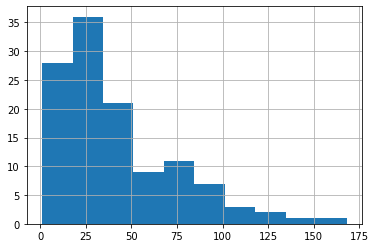

In [29]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b62cec1430>,
 'caps': [<matplotlib.lines.Line2D at 0x1b62cec1af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b62cec10d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b62cece1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b62cece550>],
 'means': []}

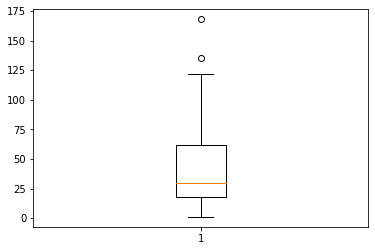

In [30]:
#Box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)

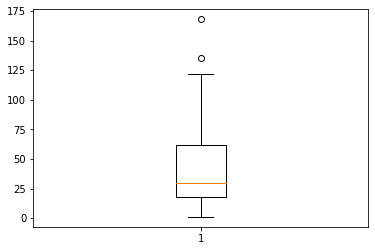

In [31]:
#Extracting outliers
box=plt.boxplot(data1_box)

In [32]:
# #fliers are outliers

[array([135., 168.])]

In [33]:
#To get the whiskers
[item.get_ydata()[1] for item in box['whiskers']]

[1.0, 122.0]

In [34]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [35]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1     41.0  190.0     7    5.0    1  2010    67       S
2     36.0  118.0     8    5.0    2  2010    72       C
3     12.0  149.0    12    5.0    3  2010    74      PS
4     18.0  313.0    11    5.0    4  2010    62       S
5      NaN    NaN    14    5.0    5  2010    56       S
..     ...    ...   ...    ...  ...   ...   ...     ...
153   20.0  223.0    11    9.0   30  2010    68       S
154   41.0  190.0     7    5.0    1  2010    67       C
155   30.0  193.0     6    9.0   26  2010    70      PS
156    NaN  145.0    13    9.0   27  2010    77       S
158   18.0  131.0     8    9.0   29  2010    76       C

[157 rows x 8 columns]

<AxesSubplot:>

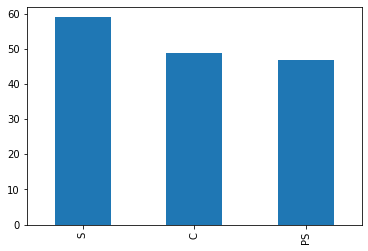

In [36]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

<AxesSubplot:>

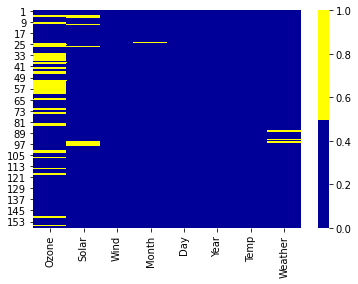

In [37]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [39]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
5     NaN    NaN    14    5.0    5  2010    56       S
6    28.0    NaN    14    5.0    6  2010    66       C
10    NaN  194.0     8    5.0   10  2010    69       S
11    7.0    NaN     6    5.0   11  2010    74       C
24   32.0   92.0    12    NaN   24  2010    61       C

In [41]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [55]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.815126050420155


In [56]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [57]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1    41.000000  190.0     7    5.0    1  2010    67       S
2    36.000000  118.0     8    5.0    2  2010    72       C
3    12.000000  149.0    12    5.0    3  2010    74      PS
4    18.000000  313.0    11    5.0    4  2010    62       S
5    41.815126    NaN    14    5.0    5  2010    56       S
..         ...    ...   ...    ...  ...   ...   ...     ...
153  20.000000  223.0    11    9.0   30  2010    68       S
154  41.000000  190.0     7    5.0    1  2010    67       C
155  30.000000  193.0     6    9.0   26  2010    70      PS
156  41.815126  145.0    13    9.0   27  2010    77       S
158  18.000000  131.0     8    9.0   29  2010    76       C

[157 rows x 8 columns]

In [58]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [59]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [60]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [61]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [62]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1    41.000000  190.0     7    5.0    1  2010    67       S
2    36.000000  118.0     8    5.0    2  2010    72       C
3    12.000000  149.0    12    5.0    3  2010    74      PS
4    18.000000  313.0    11    5.0    4  2010    62       S
5    41.815126    NaN    14    5.0    5  2010    56       S
..         ...    ...   ...    ...  ...   ...   ...     ...
153  20.000000  223.0    11    9.0   30  2010    68       S
154  41.000000  190.0     7    5.0    1  2010    67       C
155  30.000000  193.0     6    9.0   26  2010    70      PS
156  41.815126  145.0    13    9.0   27  2010    77       S
158  18.000000  131.0     8    9.0   29  2010    76       C

[157 rows x 8 columns]

In [63]:
obj_columns.shape

(157, 1)

In [64]:
#data_cleaned4=data_cleaned3.drop(['Weather'],axis=1,inplace=True)

In [65]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [66]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [54]:
data_cleaned4

Ozone  Solar  Wind  Month  Day  Year  Temp Weather Weather
1    41.000000  190.0     7    5.0    1  2010    67       S       S
2    36.000000  118.0     8    5.0    2  2010    72       C       C
3    12.000000  149.0    12    5.0    3  2010    74      PS      PS
4    18.000000  313.0    11    5.0    4  2010    62       S       S
5    41.815126    NaN    14    5.0    5  2010    56       S       S
..         ...    ...   ...    ...  ...   ...   ...     ...     ...
153  20.000000  223.0    11    9.0   30  2010    68       S       S
154  41.000000  190.0     7    5.0    1  2010    67       C       C
155  30.000000  193.0     6    9.0   26  2010    70      PS      PS
156  41.815126  145.0    13    9.0   27  2010    77       S       S
158  18.000000  131.0     8    9.0   29  2010    76       C       C

[157 rows x 9 columns]

# Scatter plot and Correlation analysis

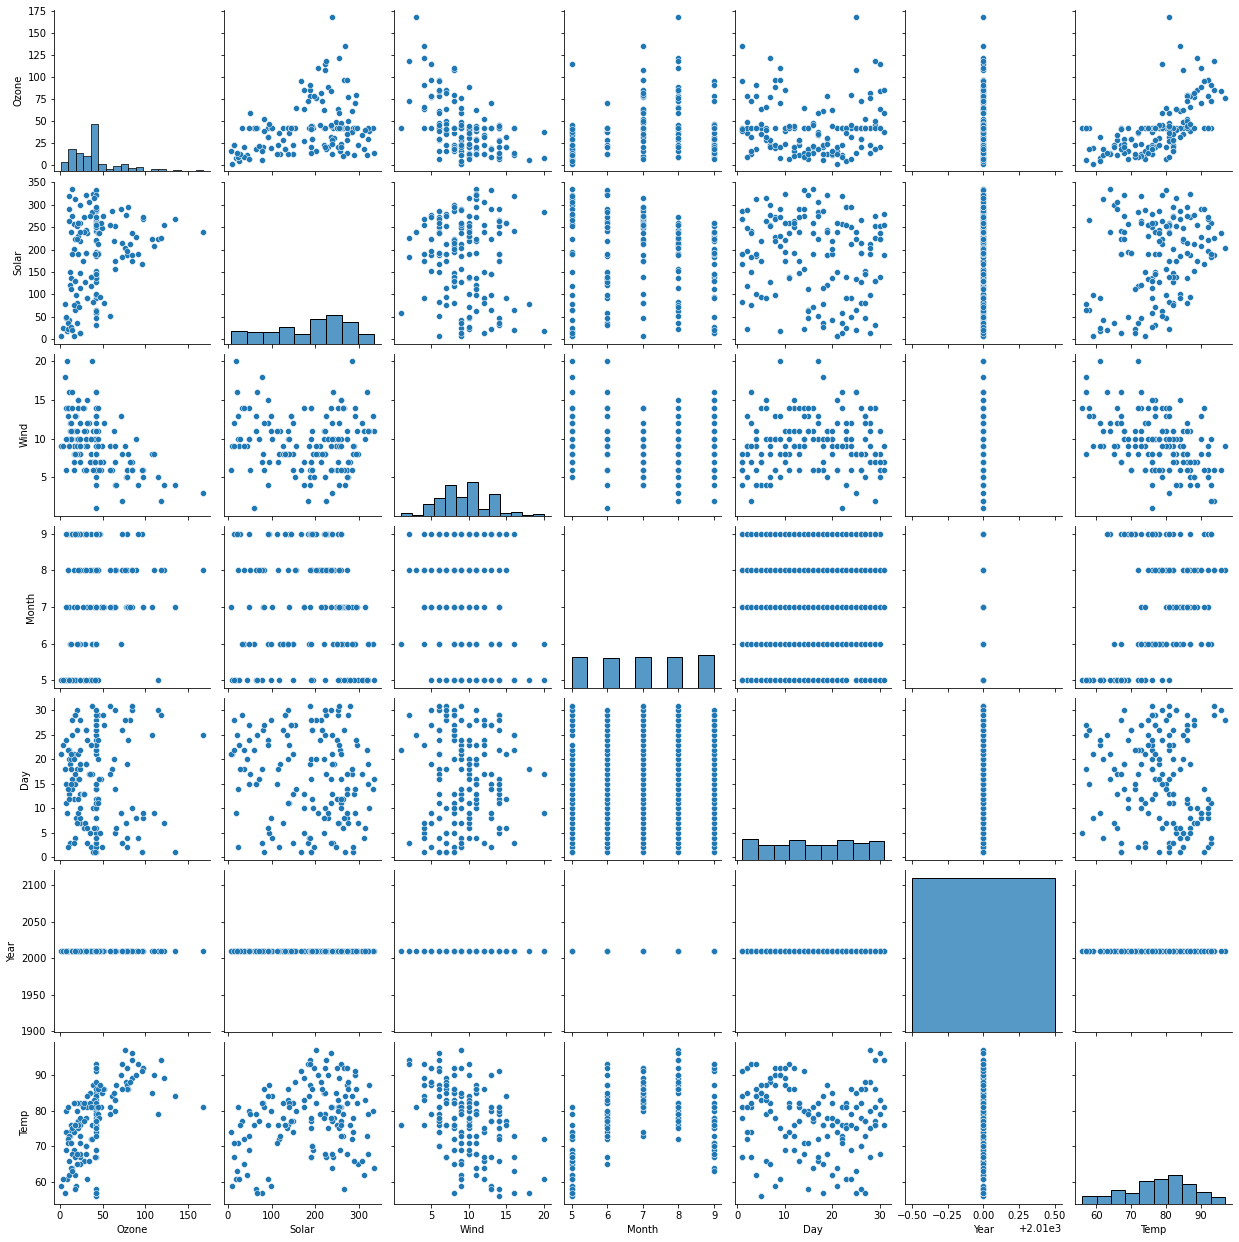

In [67]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3)

In [39]:
#Correlation
data_cleaned3.corr()

Ozone     Solar      Wind       Day  Year      Temp
Ozone  1.000000  0.308687 -0.520004 -0.021916   NaN  0.606500
Solar  0.308687  1.000000 -0.057407 -0.155663   NaN  0.273558
Wind  -0.520004 -0.057407  1.000000  0.029900   NaN -0.441228
Day   -0.021916 -0.155663  0.029900  1.000000   NaN -0.122787
Year        NaN       NaN       NaN       NaN   NaN       NaN
Temp   0.606500  0.273558 -0.441228 -0.122787   NaN  1.000000

# Transformations

#### Dummy Variable

In [68]:
data_cleaned4

Ozone  Solar  Wind  Month  Day  Year  Temp Weather Weather
1    41.000000  190.0     7    5.0    1  2010    67       S       S
2    36.000000  118.0     8    5.0    2  2010    72       C       C
3    12.000000  149.0    12    5.0    3  2010    74      PS      PS
4    18.000000  313.0    11    5.0    4  2010    62       S       S
5    41.815126    NaN    14    5.0    5  2010    56       S       S
..         ...    ...   ...    ...  ...   ...   ...     ...     ...
153  20.000000  223.0    11    9.0   30  2010    68       S       S
154  41.000000  190.0     7    5.0    1  2010    67       C       C
155  30.000000  193.0     6    9.0   26  2010    70      PS      PS
156  41.815126  145.0    13    9.0   27  2010    77       S       S
158  18.000000  131.0     8    9.0   29  2010    76       C       C

[157 rows x 9 columns]

In [69]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [70]:
data_cleaned4

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp  Weather_C  \
1     41.0    190.0     7    67.0    5.0    1  2010    67          0   
2     36.0    118.0     8    72.0    5.0    2  2010    72          1   
3     12.0    149.0    12    74.0    5.0    3  2010    74          0   
4     18.0    313.0    11    62.0    5.0    4  2010    62          0   
5      NaN      NaN    14    56.0    5.0    5  2010    56          0   
..     ...      ...   ...     ...    ...  ...   ...   ...        ...   
154   41.0    190.0     7    67.0    5.0    1  2010    67          1   
155   30.0    193.0     6    70.0    9.0   26  2010    70          0   
156    NaN    145.0    13    77.0    9.0   27  2010    77          0   
157   14.0    191.0    14    75.0    9.0   28  2010    75          0   
158   18.0    131.0     8    76.0    9.0   29  2010    76          1   

     Weather_PS  Weather_S  
1             0          1  
2             0          0  
3             1          0  
4             0          1  
5             0          1  
..          ...        ...  
154           0          0  
155           1          0  
156           0          1  
157           0          1  
158           0          0  

[158 rows x 11 columns]

In [71]:
data_cleaned4=data_cleaned4.dropna()

#### Normalization of the data

In [76]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [77]:
data_cleaned4.values

array([[ 41., 190.,   7., ...,   0.,   0.,   1.],
       [ 36., 118.,   8., ...,   1.,   0.,   0.],
       [ 12., 149.,  12., ...,   0.,   1.,   0.],
       ...,
       [ 30., 193.,   6., ...,   0.,   1.,   0.],
       [ 14., 191.,  14., ...,   0.,   0.,   1.],
       [ 18., 131.,   8., ...,   1.,   0.,   0.]])

In [78]:
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.28 0.25 0.   0.   0.   0.25 0.   0.   1.  ]
 [0.21 0.34 0.33 0.38 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.07 0.43 0.56 0.43 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.1  0.94 0.5  0.12 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.13 0.89 0.33 0.2  0.   0.2  0.   0.2  0.   1.   0.  ]]


In [79]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [80]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.69 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.41 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.73 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.41 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


# Speed up the EDA process

In [49]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

In [81]:
import pandas_profiling as pp
import sweetviz as sv

In [52]:
!python --version


Python 3.8.8


In [82]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\chira\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')

                                             |                                                                …

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
